Taille de l'ensemble d'entraînement : (60000, 28, 28) (60000,)
Taille de l'ensemble de test : (10000, 28, 28) (10000,)


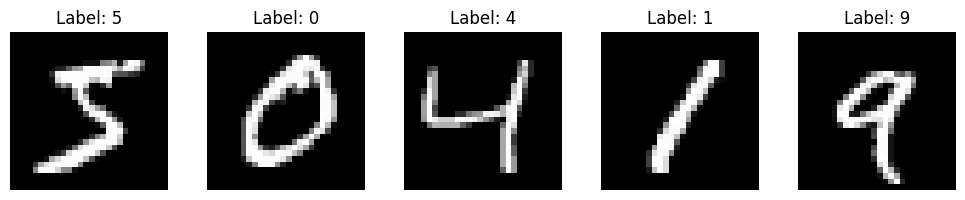

In [3]:
import tensorflow as tf
import pandas as pd
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np

# 1. Importation des données
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# 2. Exploration des données
print("Taille de l'ensemble d'entraînement :", X_train.shape, y_train.shape)
print("Taille de l'ensemble de test :", X_test.shape, y_test.shape)

# Afficher des exemples d'images et leurs étiquettes
num_examples = 5
plt.figure(figsize=(10, 2))
for i in range(num_examples):
    plt.subplot(1, num_examples, i + 1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()



In [ ]:
from sklearn.model_selection import train_test_split

# 1. Normalisation des données
X_train = X_train / 255.0
X_test = X_test / 255.0


print("Valeurs des pixels après normalisation :")
print(f"Min: {X_train.min()}, Max: {X_train.max()}")


#2. Division de l'ensemble d'entraînement en données d'entraînement et de validation

X_train, X_test, y_train, y_test = train_test_split(X_train,y_train, test_size=0.2, random_state=42)



Valeurs des pixels après normalisation :
Min: 0.0, Max: 1.0



Matrice de confusion pour k=1:


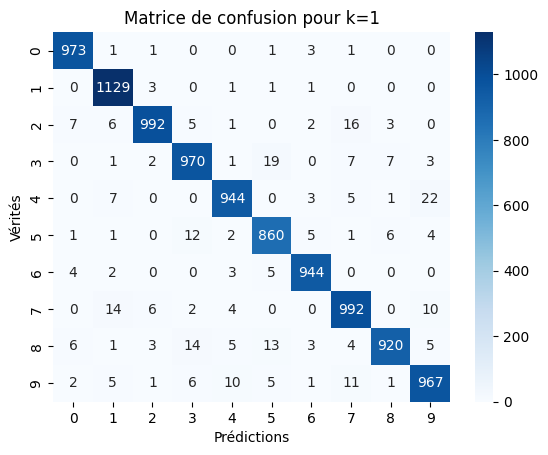


Matrice de confusion pour k=3:


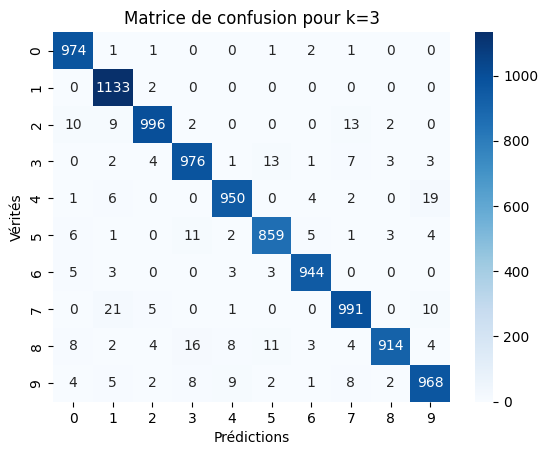

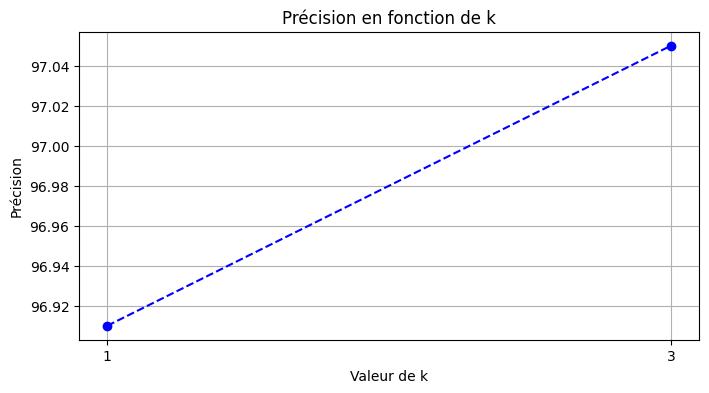

Le k optimal est 3 avec une précision de 97.0500


In [7]:
# Implémentation de KNN :
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


#Rendre notre X_train et X_test qui sont des images de 28x28 à un vecteur
# (60000, 28, 28) 3D --- ((60000, vecteur) 2D
X_train_reshape = X_train.reshape(X_train.shape[0], -1)
X_test_reshape = X_test.reshape(X_test.shape[0], -1)
# 2. Tester différentes valeurs de k
k_values = [1, 3]
accuracies = []

for k in k_values:
    # Entraîner un modèle KNN
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train_reshape, y_train)

    # Faire la prédiction
    predict = model.predict(X_test_reshape)

    # Calculer la précision
    accuracy = accuracy_score(y_test, predict)
    accuracies.append(accuracy*100)

    # Afficher la matrice de confusion pour chaque k
    print(f"\nMatrice de confusion pour k={k}:")
    cm = confusion_matrix(y_test, predict)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Matrice de confusion pour k={k}")
    plt.xlabel("Prédictions")
    plt.ylabel("Vérités")
    plt.show()

# 3. Tracer la précision en fonction de k
plt.figure(figsize=(8, 4))
plt.plot(k_values, accuracies, marker='o', linestyle='--', color='b')
plt.title("Précision en fonction de k")
plt.xlabel("Valeur de k")
plt.ylabel("Précision")
plt.xticks(k_values)
plt.grid(True)
plt.show()

# Identifier le meilleur k
best_k = k_values[np.argmax(accuracies)]
print(f"Le k optimal est {best_k} avec une précision de {max(accuracies):.4f}")

